In [ ]:
# necessary imports for project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [ ]:
# reading in the data file
wine = pd.read_csv("https://raw.githubusercontent.com/M0nster5/CS4372-Projects/main/Linear%20Regression/winequality-red.csv", sep= ';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Data Inconsistencies

In [ ]:
#Check for null values
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
#Check the value types
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
#Check how many data points there are for each quality
wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

## Data Summary

In [ ]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:

sns.set(style="ticks")

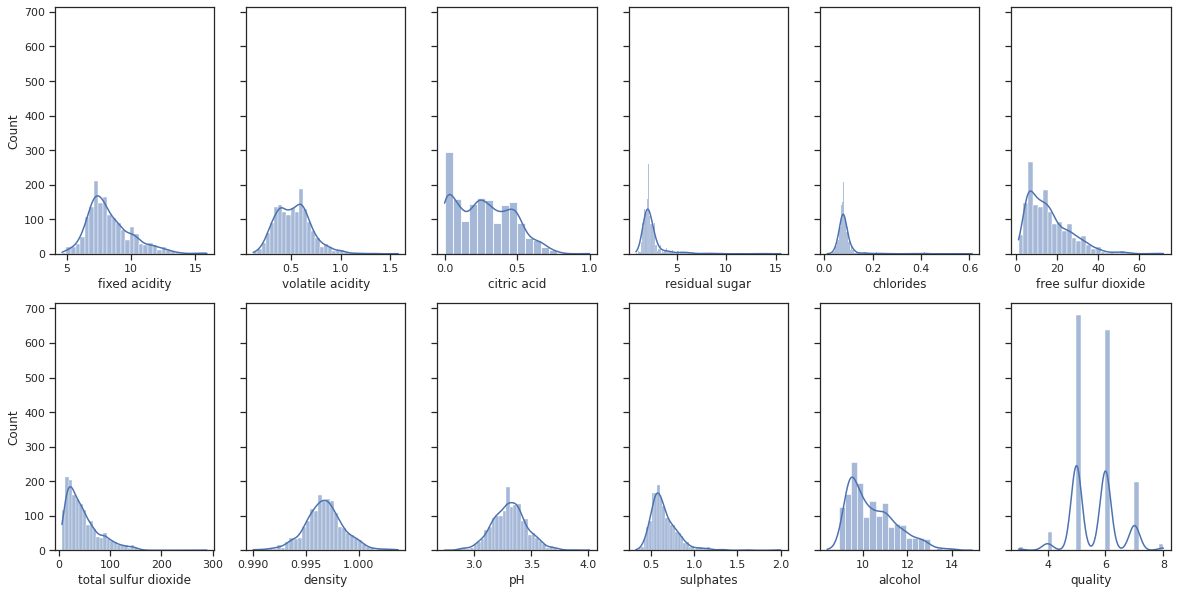

In [ ]:
#Plot the count of data points for each regressor value
fig, axes = plt.subplots(2, 6, figsize=(20, 10), sharey=True)

for index, name in enumerate(wine.columns):
  sns.histplot(ax=axes[int(index/6)][index%6], data=wine, x=name, kde=True)

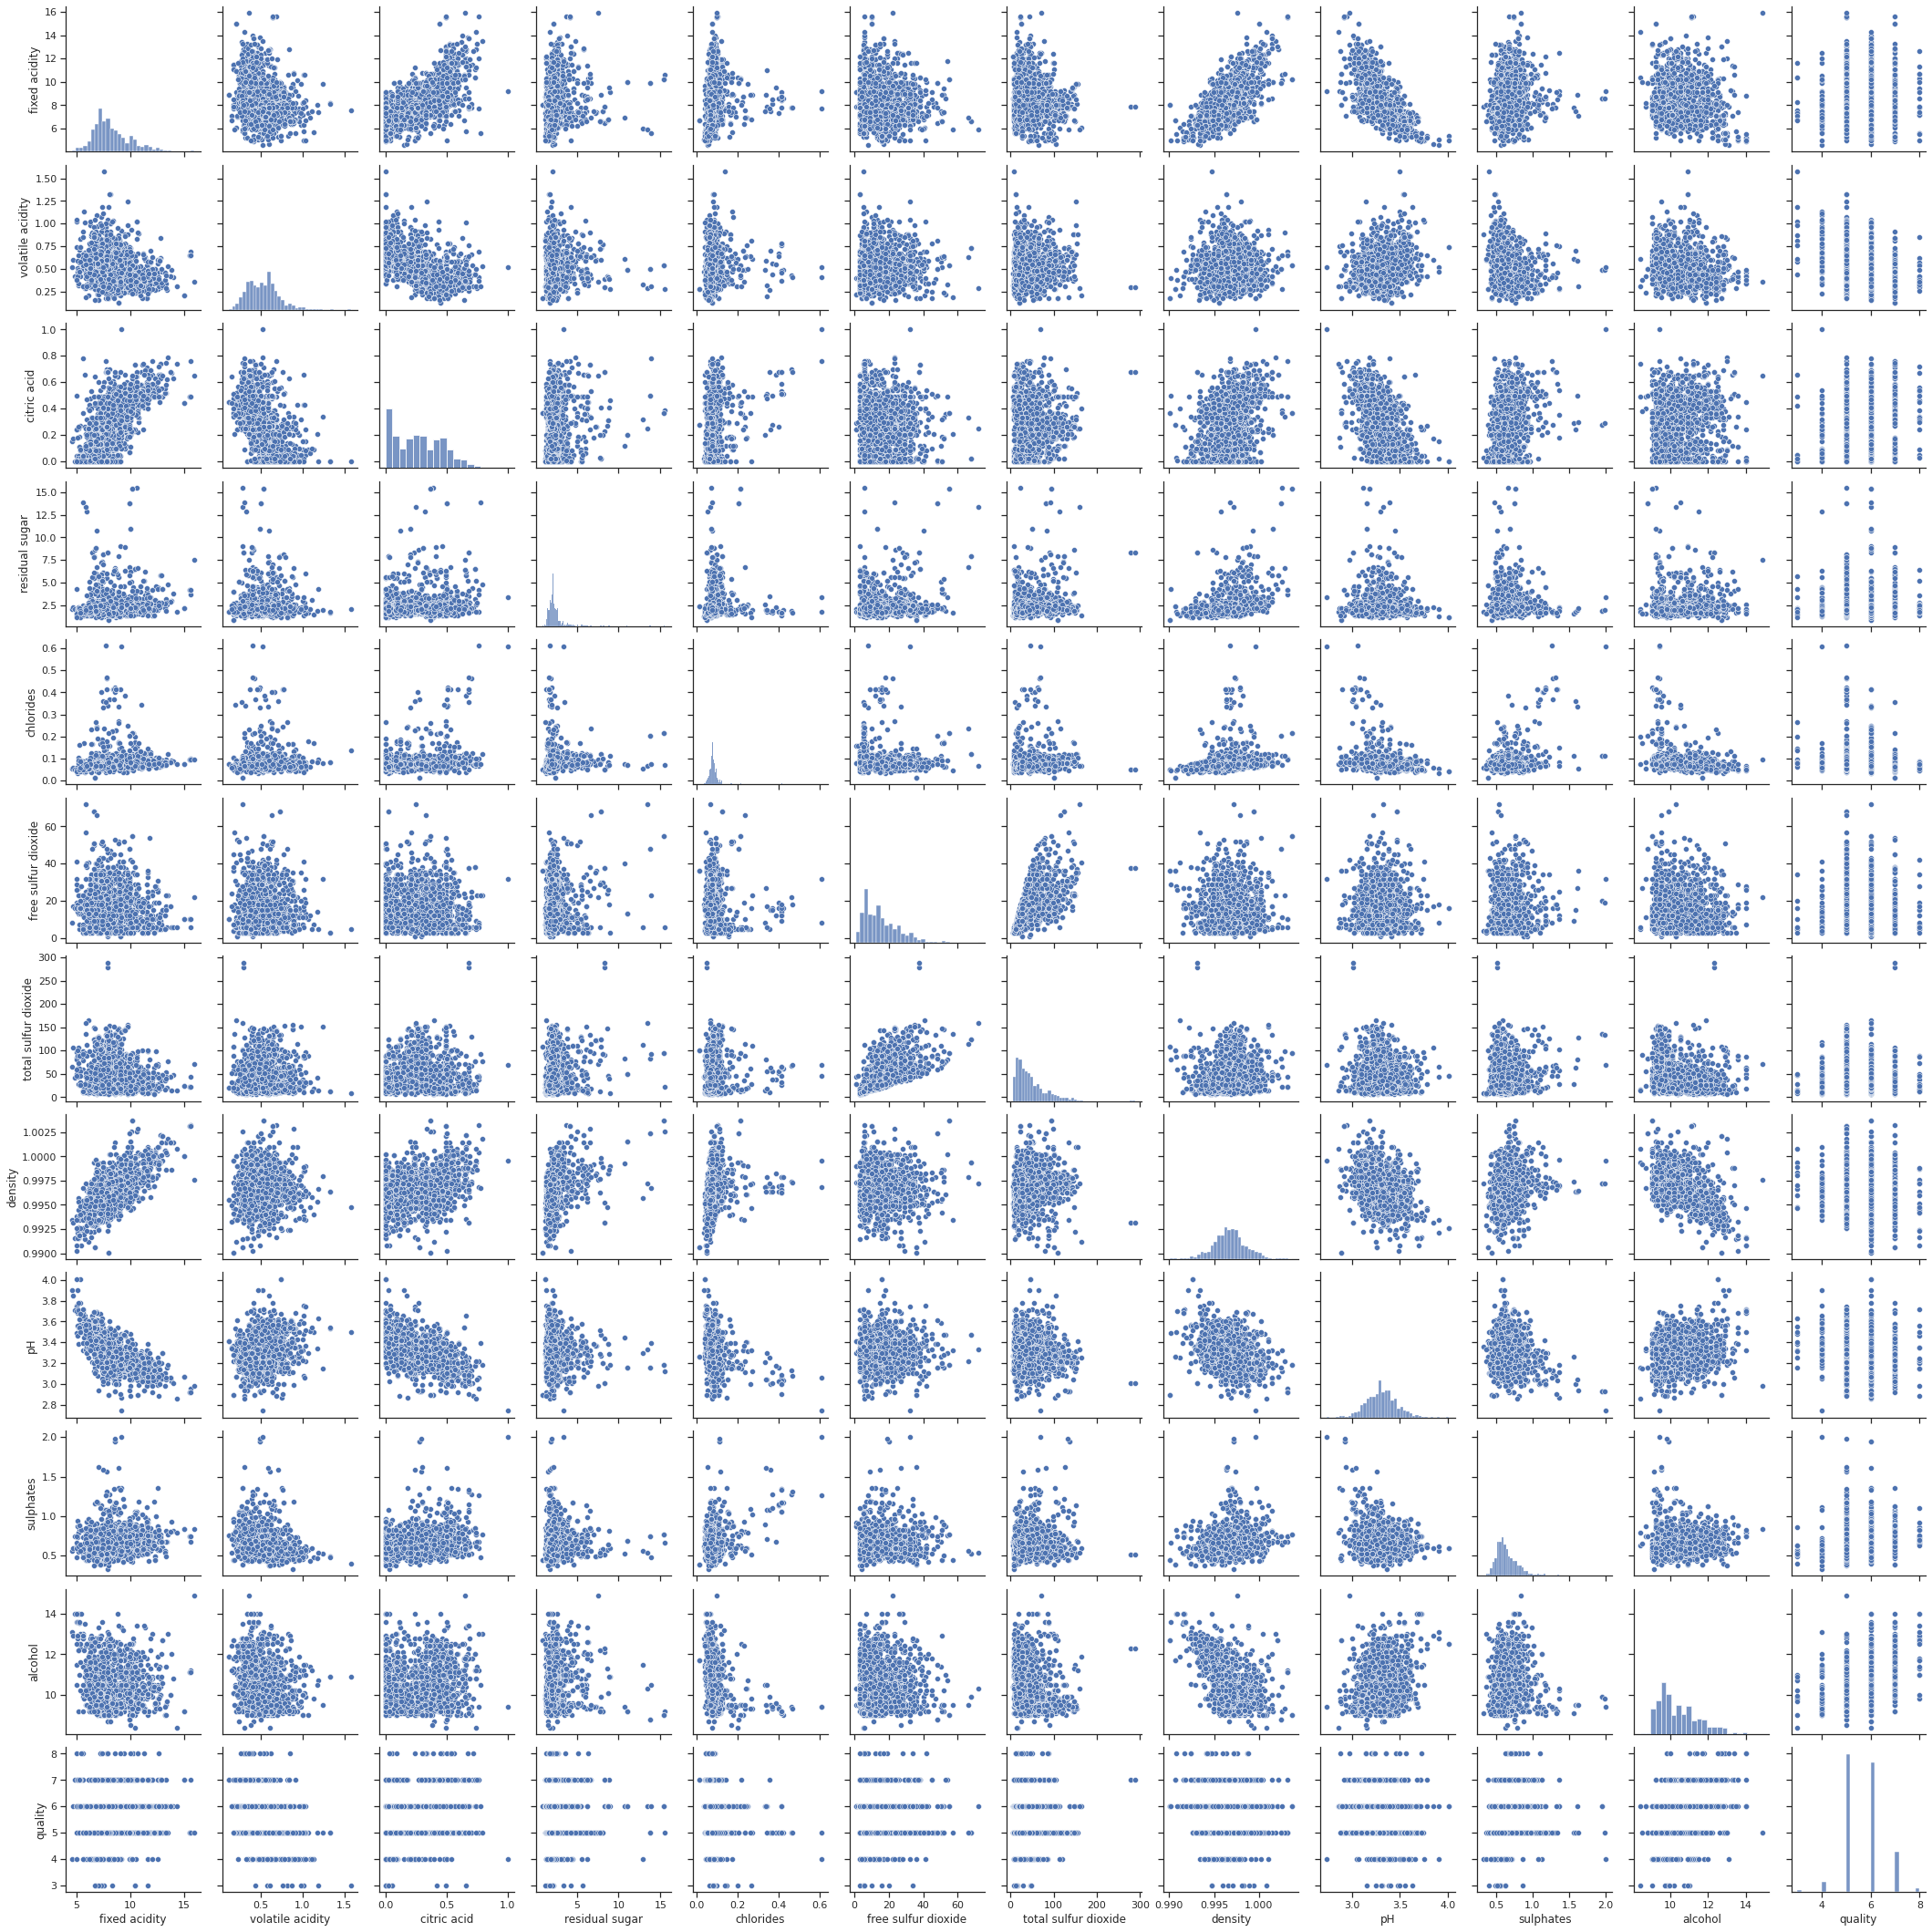

In [ ]:
#Plot each regressor against each other
sns.pairplot(wine)

In [ ]:
sns.set(style="darkgrid")

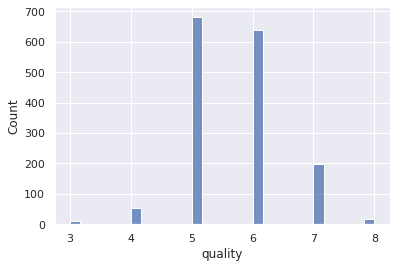

In [ ]:
# looking at frequency of predictor
sns.histplot(wine['quality'])

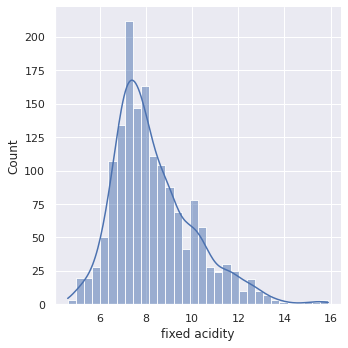

In [ ]:
# looking at fixed acidity
sns.displot(wine, x="fixed acidity", kde=True, rug=False )

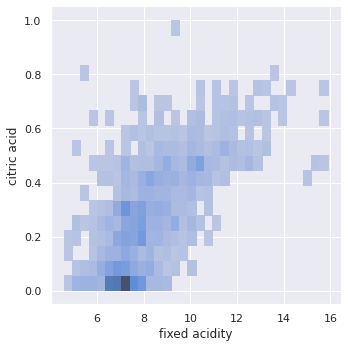

In [ ]:
#Looking at density of fixed acidity vs citric acid
sns.displot(wine, x="fixed acidity", y="citric acid")

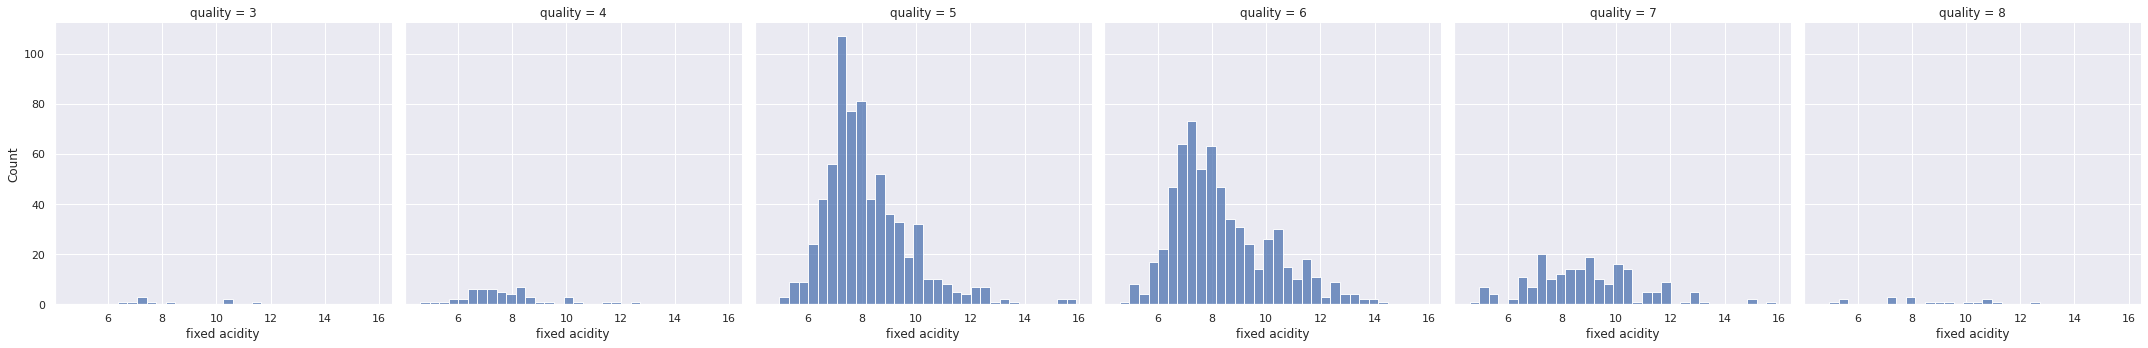

In [ ]:
#Seeing how fixed acidity contributes to each wine quality
sns.displot(wine, x="fixed acidity", col="quality")

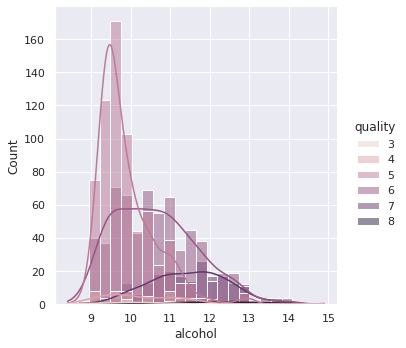

In [ ]:
# Seeing how alchol level contributes to the quality of the wine
sns.displot(wine, x='alcohol', hue='quality', kde=True)

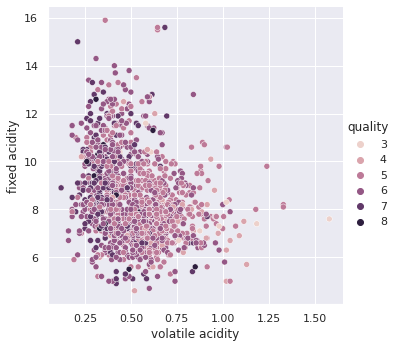

In [ ]:
# Seeing how acidity has an effect on wine quality
sns.relplot(data=wine, x='volatile acidity', y='fixed acidity', hue='quality')

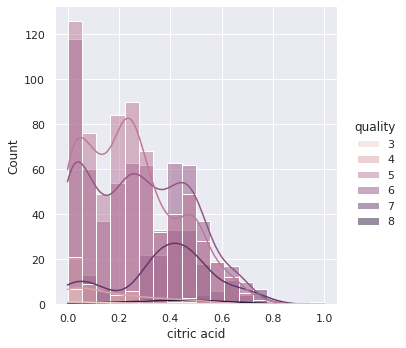

In [ ]:
# Seeing how citric acid contributes to the quality of the wine
sns.displot(wine, x='citric acid', hue='quality', kde=True)

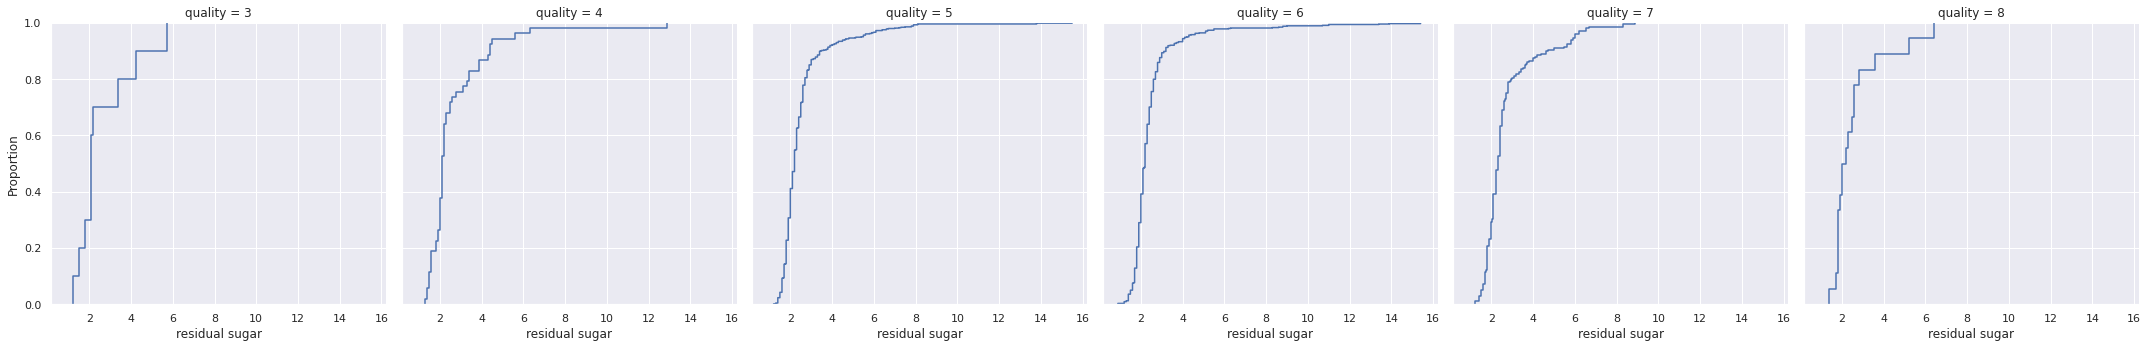

In [ ]:
# Seeing how much residual sugar is in each quality of wine
sns.displot(wine, x='residual sugar', col='quality', kind = "ecdf")

## Scaling and Normalizing

In [ ]:
#Create min max scaler and scale the data
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
wine_scaled = pd.DataFrame(mm.fit_transform(wine), columns = wine.columns)

## How does Data Relate 

In [ ]:
# Seeing how each regressor relates to the other
wine_scaled.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


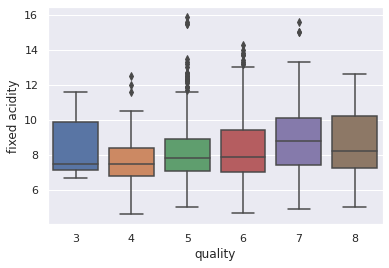

In [ ]:
#Looking at where fixed acidity sits for each wine quality
sns.boxplot(data=wine, x= 'quality', y='fixed acidity')

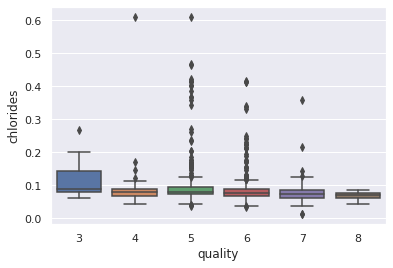

In [ ]:
#Looking at where chlorides sit for each wine quality
sns.boxplot(data=wine, x= 'quality', y='chlorides')

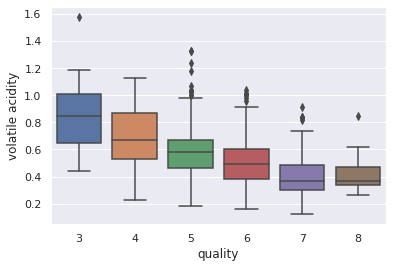

In [ ]:
# Seeing how volatile acidity sits for each wine quality
sns.boxplot(data=wine, x='quality' , y='volatile acidity')

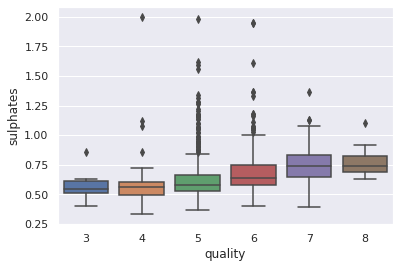

In [ ]:
#Seeing where sulphates sit for each wine quality
sns.boxplot(data=wine, x='quality' , y='sulphates')

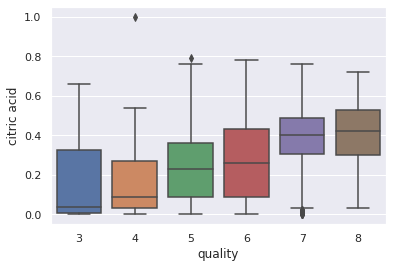

In [ ]:
# Seeing where citric acid sits for each wine quality
sns.boxplot(data=wine, x='quality' , y='citric acid')

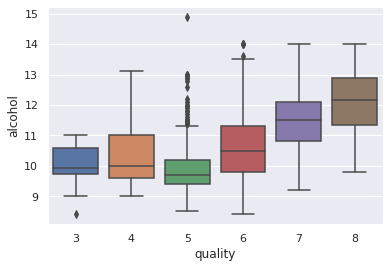

In [ ]:
#Seeing where alcohol sits for each wine quality
sns.boxplot(data=wine, x='quality' , y='alcohol')

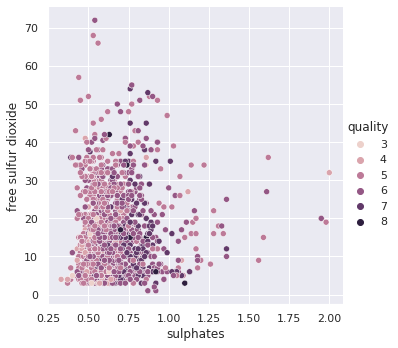

In [ ]:
#looking at how sulphates relate to free sulfur dioxide for each wine quality
sns.relplot(data=wine, x= 'sulphates', y='free sulfur dioxide', hue='quality')

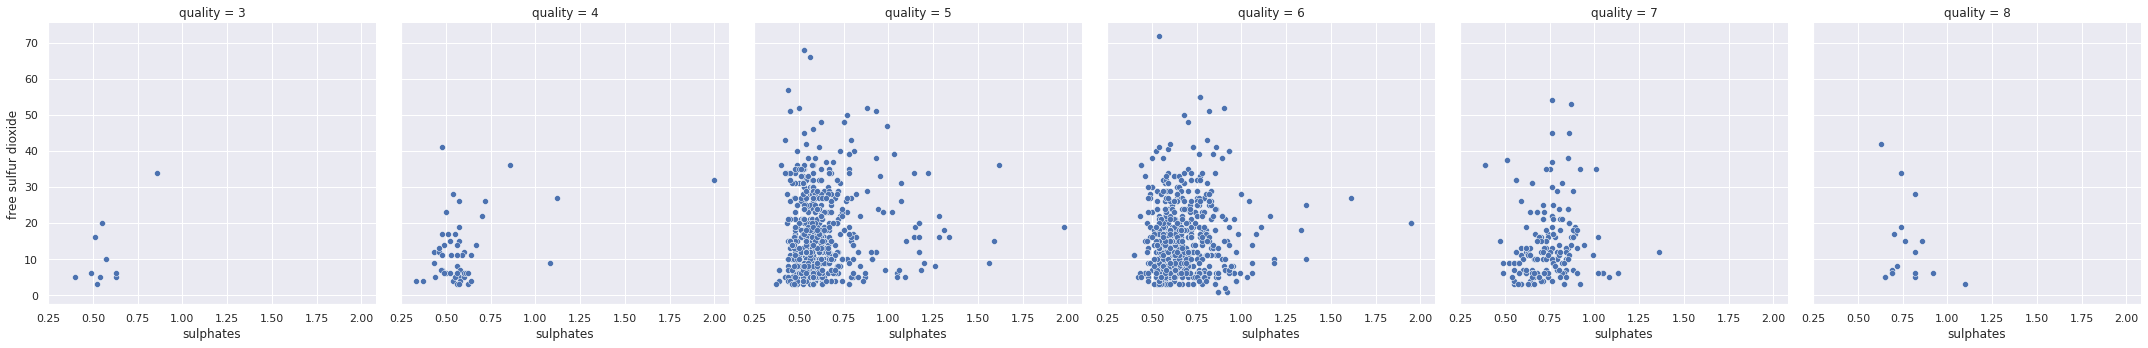

In [ ]:
#seeing how sulphates and free sulfur dioxide relate to each wine quality
sns.relplot(data=wine, x= 'sulphates', y='free sulfur dioxide', col='quality')

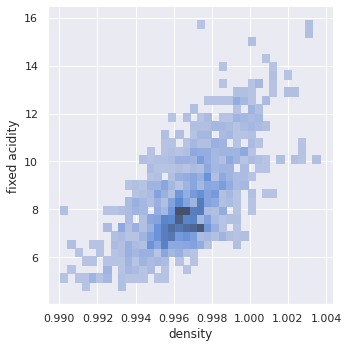

In [ ]:
# looking at the density plot of fixed acidity vs density
sns.displot(data=wine, x='density', y='fixed acidity')

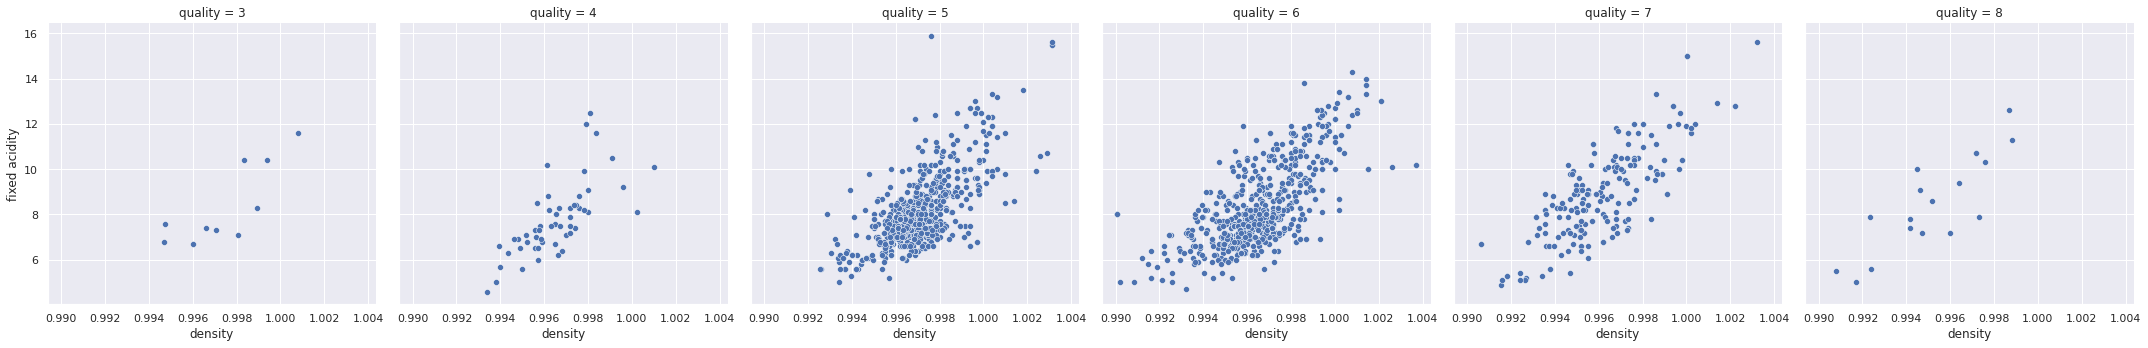

In [ ]:
#seeing how density and fixed acidity both contribute to each wine quality
sns.relplot(data=wine, x='density', y='fixed acidity', col='quality')

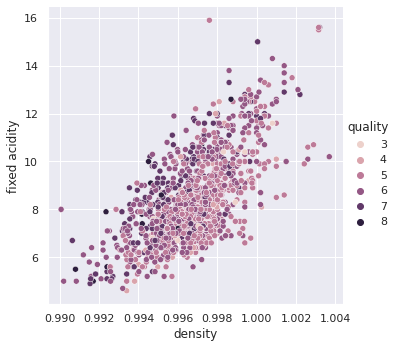

In [ ]:
#Seeing how density and fixed acidity determine wine quality
sns.relplot(data=wine, x='density', y='fixed acidity', hue='quality')

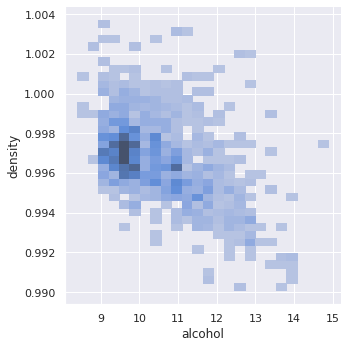

In [ ]:
#looking at the density plot of density vs alcohol
sns.displot(wine, x='alcohol', y='density')

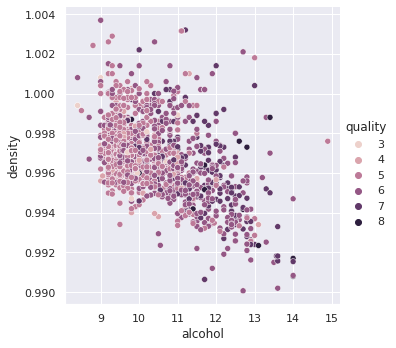

In [ ]:
#looking at how alchohol and density relate to the quality of wine
sns.relplot(data=wine, x='alcohol', y='density', hue='quality')

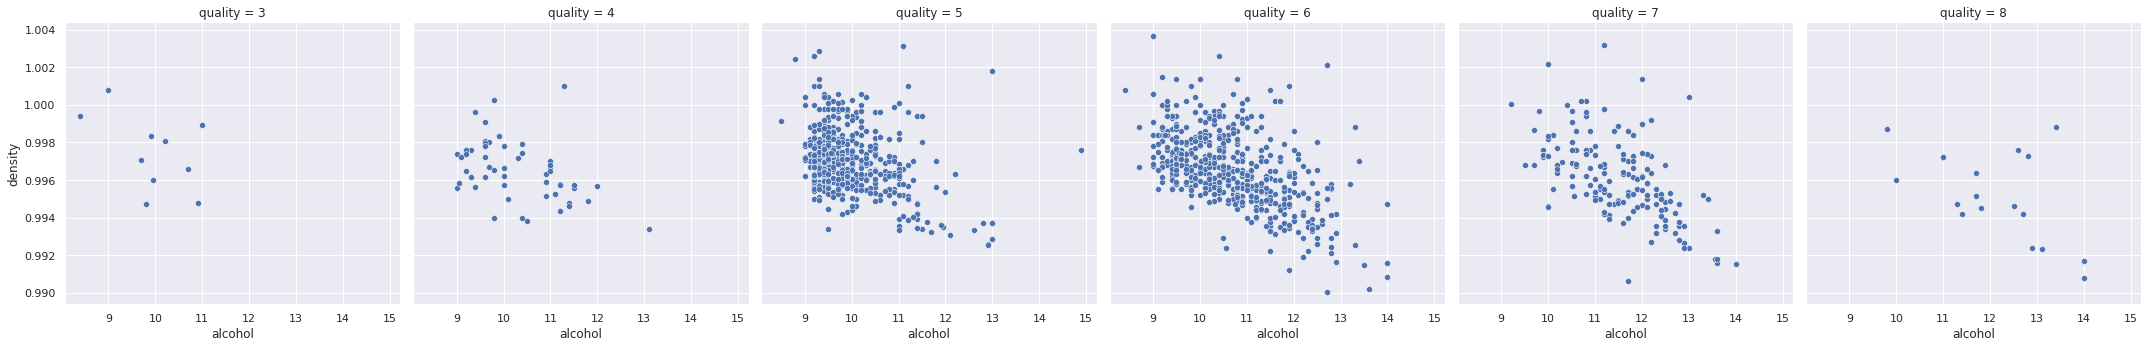

In [ ]:
# seeing how alcohol and density relate for each wine quality
sns.relplot(data=wine, x='alcohol', y='density', col='quality')

- alcohol
- volatile acidity
- sulphates
- citric acid
- chlorides

# Split Train Test




In [ ]:
#selecting the regressors for the model
wine_scaled = wine_scaled[['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'chlorides', 'quality']]

In [ ]:
# Get X values
X = wine_scaled[['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'chlorides']]

In [ ]:
# Get Y values
Y = wine_scaled.quality

In [ ]:
#Split data for training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

# SGD Model

In [ ]:
#import sklearn models
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Create paramater grid 
param_grid = {
    'alpha': [0.00001, 0.0001, .001, .01],
    'max_iter': [10000, 5000, 1000, 500],
    'learning_rate': ['constant', 'optimal', 'invscaling']
}
my_grid = ParameterGrid(param_grid)

In [ ]:
# Find the ideal combination of parameters
for param in my_grid:
  sgd = SGDRegressor(**param)
  sgd.fit(X_train, Y_train)
  print(param)
  print("Train Statistics:")
  print("Mean Absolute Error: " +str(mean_absolute_error(Y_train, sgd.predict(X_train))))
  print("Mean Squared Error: " +str(mean_squared_error(Y_train, sgd.predict(X_train))))
  print("R2 Score: " +str(r2_score(Y_train, sgd.predict(X_train))))
  print("\nTest Statistics")
  print("Mean Absolute Error: " +str(mean_absolute_error(Y_test, sgd.predict(X_test))))
  print("Mean Squared Error: " +str(mean_squared_error(Y_test, sgd.predict(X_test))))
  print("R2 Score: " +str(r2_score(Y_test, sgd.predict(X_test))))
  print("-----------------------------------------------")

{'alpha': 1e-05, 'learning_rate': 'constant', 'max_iter': 10000}
Train Statistics:
Mean Absolute Error: 0.10555428575626419
Mean Squared Error: 0.01781387535614606
R2 Score: 0.31742471989117216

Test Statistics
Mean Absolute Error: 0.10208732293154302
Mean Squared Error: 0.01699157730948122
R2 Score: 0.3454452198890695
-----------------------------------------------
{'alpha': 1e-05, 'learning_rate': 'constant', 'max_iter': 5000}
Train Statistics:
Mean Absolute Error: 0.10640568959517673
Mean Squared Error: 0.01789767017422077
R2 Score: 0.3142139490580148

Test Statistics
Mean Absolute Error: 0.10346373838383605
Mean Squared Error: 0.01698376227277647
R2 Score: 0.34574627314261186
-----------------------------------------------
{'alpha': 1e-05, 'learning_rate': 'constant', 'max_iter': 1000}
Train Statistics:
Mean Absolute Error: 0.10491865776966278
Mean Squared Error: 0.0178737414588193
R2 Score: 0.3151308270136117

Test Statistics
Mean Absolute Error: 0.10050343914708393
Mean Squared E

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [ ]:
#Create SGD Regressor model
sgd = SGDRegressor(alpha=.0001, learning_rate='optimal', max_iter=5000)
sgd.fit(X_train, Y_train)
sgd.coef_
sgd.intercept_

array([ 0.4635992 , -0.32204309,  0.21566742, -0.00132858, -0.26230236])

In [ ]:
#import OLS model
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [ ]:
#Create OLS model and view results
X_train_off = sm.add_constant(X_train)
smRegression = sm.OLS(Y_train, X_train_off)
 
model = smRegression.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     129.0
Date:                Mon, 19 Sep 2022   Prob (F-statistic):          1.23e-110
Time:                        13:02:41   Log-Likelihood:                 778.81
No. Observations:                1279   AIC:                            -1546.
Df Residuals:                    1273   BIC:                            -1515.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4763      0.018  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
